## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import boxcox

#### Load the dataset

In [2]:
df = pd.read_csv('data_stats.csv')
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


### Shape of the dataset

In [3]:
df.shape

(50, 7)

#### Info about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


#### Description about the dataset

In [5]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


## Measures of Central Tendency
Measures of central tendency describe the center of the data, and are often represented by the mean, the median, and the mode.

## Mean

Mean is the arithmetic average of the data. It is basically the center point of any data. The arithmetic mean of a data set is the sum of all values divided by the total number of values.

Formula:
$$ \bar{x} \ =\frac{\sum_{i=0}^{n} \ x}{n} $$

where 
$$ \bar{x}:  mean $$
$$ \frac{\sum_{i=0}^{n} \ x} \ sum \ of \ all \ values \ in \ the\ sample \ data \ set $$
$$ n: \ number \ of \ values \ in \ the \ sample \ data \ set $$

### Calculating the mean of the dataset

#### with built-in library

In [6]:
df.mean()

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

### We can calculate the mean of the rows by specifying (axis = 1) argument.

In [7]:
df.mean(axis=1)[0:5]

0    13200.666667
1    15987.166667
2    21217.166667
3    18200.333333
4    29083.833333
dtype: float64

In [8]:
data = df[['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members','Emi_or_Rent_Amt', 'Annual_HH_Income','No_of_Earning_Members']]

In [9]:
data.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'No_of_Earning_Members'],
      dtype='object')

#### without using built-in function

In [10]:
get_sum = data.sum()
n = len(data)

mean = (get_sum)/n
mean

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

## Median

Median is the point which divides the data point into the equal halves. The median is calculated by following steps:<br>
1.First sorting the data in ascending order.<br>
2.If the number of observations are odd, median is given by the middle value in the sorted form.<br>
3.If the number of observations are even, median is given by the mean of the two middle values in the sorted form.

### Calculating the median of the dataset

#### with built-in library

In [11]:
df.median()

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

### We can calculate the median of the rows by specifying (axis = 1) argument.

In [12]:
df.median(axis=1)[0:5]

0    3500.0
1    4500.0
2    2251.0
3    1000.5
4    7500.0
dtype: float64

In [13]:
data = data.apply(lambda x: x.sort_values().values)
n=len(data)
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,5000,2000,1,0,64200,1
1,6000,4500,2,0,79920,1
2,10000,5000,2,0,97200,1
3,10000,6600,2,0,112800,1
4,12500,7000,2,0,147000,1


#### without using built-in function

In [14]:
x=list(data.columns)
z=[]
for i in range(6):
    z.append(list(data.iloc[0:,i]))
for i in range(6):  
    if n % 2 == 0:
        median1 = z[i][n//2]

        median2 = z[i][n//2 - 1]
        median = (median1 + median2)/2
    else:
        median =z[i][n//2]

    print(str(x[i]),(median))

Mthly_HH_Income 35000.0
Mthly_HH_Expense 15500.0
No_of_Fly_Members 4.0
Emi_or_Rent_Amt 0.0
Annual_HH_Income 447420.0
No_of_Earning_Members 1.0


## Mode

Mode represents the most frequent value of a variable in the data.<br>
This is the only central tendency measure that can be used with categorical variables, unlike the mean and the median which can be used only with quantitative data.

### Calculating the mode of the dataset

#### with built-in library

In [15]:
df.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,45000,25000,4,0,590400,Graduate,1


* The mode value of 4 for the variable 'No_of_Fly_Members' means that the highest number (or frequency) of number of family members are 4.
* Most of them are Gradutes.

#### without built-in library

In [16]:
for i in range(6):
    m=max(z[i],key=z[i].count)
    print(str(x[i]),':',m)

Mthly_HH_Income : 45000
Mthly_HH_Expense : 25000
No_of_Fly_Members : 4
Emi_or_Rent_Amt : 0
Annual_HH_Income : 590400
No_of_Earning_Members : 1


## Measures of Dispersion
The most popular measures of dispersion are standard deviation, variance, and the interquartile range.

### Variance
Variance is a statistical measurement of spread between numbers in a dataset.<br>
To be specific the variance basically measure the distance of data points from the mean of that dataset.

Formula :
    $$ \sigma^2 =\frac {\sum_{i=1}^{n} (x_i - \bar{x})^2} {n} $$
     Where 
    $$ x^i = i^{th} \; datapoint   $$ 
    $$ \bar{x} = \; Mean \; of \; all \; Datapoints $$ 
    $$ n= \; no \; of datapoints $$

### Calculating the variance of the dataset

#### with built-in library

In [17]:
df.var()

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

#### without using built-in function

In [18]:
sum=0
n = len(data)
variance=[]
mean1=list(data.sum()/n)
for i in range(6):
    for j in range(50):
        sum=sum+(z[i][j]-mean1[i])**2
    variance.append(sum/n)
    sum=0
print(variance)

[667478836.0, 143249876.0, 2.2563999999999984, 38176400.0, 100437186889.95831, 0.5284]


## Standard Deviation

Standard deviation is a measure that is used to quantify the amount of variation of a set of data values from its mean.<br>
A low standard deviation for a variable indicates that the data points tend to be close to its mean, and a higher value of standard deviation denotes that the data points are spread wide range. 

Formula:
        $$ \sigma =\sqrt{\frac {\sum_{i=1}^{n} (x_i - \bar{x})^2} {n}} $$

where:
$$ x^i \;= \;Value \; of \; the \; i^{th} \; point \; in \; the \; data \; set $$
$$ \bar{x} \;\; = \; \;The \; mean \; value \; of \; the \; data \; set $$
$$ n \; = \; The \; number \; of \; data \; points \; in \; the \; data \; set $$

### Calculating the standard deviation of the dataset

#### with built-in library

In [19]:
df.std()

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

#### without using built-in function

In [20]:
import math
sum=0
n = len(data)
stddev=[]
mean1=list(data.sum()/n)
for i in range(6):
    for j in range(50):
        sum=sum+(z[i][j]-mean1[i])**2
    stddev.append(math.sqrt(sum/n))
    sum=0
print(stddev)

[25835.611779092826, 11968.704023410388, 1.5021318184500314, 6178.705366013175, 316918.26531451027, 0.72691127381545]


## Correlation

Correlation is a statistical measurement to measure the relation betwen two  variables.<br>
The Correlation between two variables lies in between -1 to +1. If our correlation value >1 or <1 then there must be some error in our calculations.<br>
The +1 known as positive co-rrelation and -1 denotes the negative correlation.

Formula:
$$ \ r = \frac {\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y}) }{\sqrt {\sum_{i=1}^{n} (x_i - \bar{x})^2 (y_i - \bar{y})^2}} $$

where
$$ r  =  correlation \ coefficient $$
$$ x_{i}	= values \ of \ the \ x-variable \ in \ a \ sample $$
$$ \bar{x} 	=	\ mean \ of \ the \ values \ of \ the \ x-variable $$
$$ y_{i} 	=	\ values \ of \ the \ y-variable \ in \ a \ sample $$
$$ \bar{y} 	=	\ mean \ of \ the \ values \ of \ the \ y-variable $$

### Calculating the correlation of the dataset

#### with built-in library

In [21]:
df.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


Text(0.5, 1.0, 'Correlation Plot to check Relation between Variables')

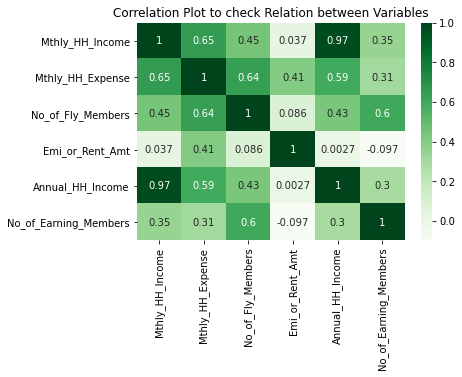

In [22]:
sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.title("Correlation Plot to check Relation between Variables")

* We can see that Annual Income and Monthly Income are highly correlated with each other.
* We can see that the number of earning members and EMI or rent amount are negatively correlated with each other.

#### Without Library Function

In [23]:
x = z[0]
y = z[1]

x_mean = np.sum(x) / len(x)
y_mean = np.sum(y) / len(y)

cov_xy = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
cov_xy = np.sum(cov_xy) / len(cov_xy)

x_std = (np.sum([(i - x_mean)**2 for i in x])/len(x))**0.5
y_std = (np.sum([(i - y_mean)**2 for i in y])/len(x))**0.5

correlation = cov_xy/(x_std*y_std)

print('Pearson Correlation Coefficient :', correlation)

Pearson Correlation Coefficient : 0.984269278598793


## Normal Distribution

Normal distribution is also known as gaussian distribution.<br>
It is a probability distribution and also symmetric about the mean and showing the data near the mean are more frequent in occurrence than data far from the mean.

### Check the distribution plot for monthly expenses

Text(0.5, 1.0, 'Dist plot for Monthly Expenses')

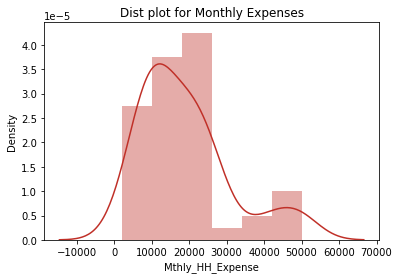

In [24]:
sns.distplot(df['Mthly_HH_Expense'],color='#C03028')
plt.title("Dist plot for Monthly Expenses")

* We can observe that the minimum expense is 2000.
* Median is around 15500.
* We can see that Maximum value is 50000.
* We can observe that it is a right skewed distribution.

## Feature of Normal Distribution

Properties of Normal Distribution are as follows:
1. Unimodal - one mode.<br>
2. Symmetrical -left and right halves are mirror images.<br>
3. Bell-shaped -maximum height (mode) at the mean.<br>
4. Mean, Mode, and Median are all located in the center.<br>
5. Asymptotic

### SKEW OF DISTRIBUTION 

In a Distribution if one tail is longer than other tail then it is skew.<br>
Skewness also called as assymmetric distributions as they don't show any kind of symmetric properties but normal distribution show the symmetric property.<br>
Symmetric means one tail is the mirror image of other half.

### Positively Skewed & Negatively Skewed Normal Distribution

A right-skewed or positively skewed distribution is the one where the right tail is longer than the left one.<br>
Here the mean > median > mode.

A left-skewed or negatively skewed distribution is one where the left tail is longer than that of the right tail.<br>
Here, the mean < median < mode.

* 1.If skewness is < -1 or > 1, the distribution is highly skewed.
* 2.If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
* 3.If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [25]:
df.skew()

Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

* We can see that Emi_or_Rent_Amt column is highly skewed.

### Check the distribution plot for monthly income

Text(0.5, 1.0, 'Dist plot for Monthly Income')

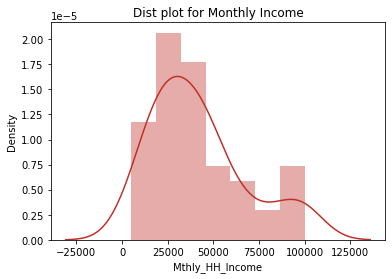

In [26]:
sns.distplot(df['Mthly_HH_Income'],color='#C03028')
plt.title("Dist plot for Monthly Income")

* We can observe that the minimum income is 5000.
* Median is around 35000.
* We can see that Maximum value is 100000.
* We can observe that it is a right skewed distribution.

## Effect on Mean, Median and Mode due to Skewness


* The preferred measure of central tendency often depends on the shape of the distribution.<br>
Of the three measures of tendency, the <b>mean</b> is most influenced by any outliers or skewness.<br><br>

* In a symmetrical distribution, the mean, median, and mode are all equal.<br>
In these cases, the <b>mean</b> is often the preferred measure of central tendency.<br><br>

* For distributions that have outliers or are skewed, the <b>median</b> is often the preferred measure of central tendency because the median is more resistant to outliers than the mean.<br><br>

* If the distribution is skewed to the left that means the<b> mean < median < mode </b> <br><br>

* If the distribution is skewed to the right that means the <b> mean > median > mode </b>

### Check the distribution plot for monthly expenses

Text(0.5, 1.0, 'Dist plot for Monthly Expenses')

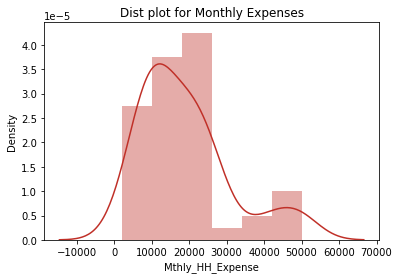

In [27]:
sns.distplot(df['Mthly_HH_Expense'],color='#C03028')
plt.title("Dist plot for Monthly Expenses")

* We can observe that it is a right skewed distribution.

## Explain QQ Plot and show the implementation of the same

QQ Plots (Quantile-Quantile plots) are plots of two quantiles against each other. <br>
The purpose of QQ plots is to find out if two sets of data come from the same distribution. 

#### Plotting a qqplot for monthly income

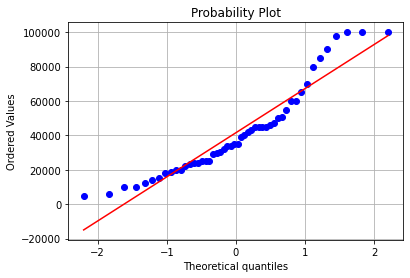

In [28]:
stats.probplot(df['Mthly_HH_Income'], dist="norm",plot=plt)
plt.grid()

## Explain Box Cox and show the implementation of the same


A Box-Cox plot is basically used to convert the non-normally distributed dataset into the normally distributed dataset.

#### Box-Cox transformation

<AxesSubplot:ylabel='Density'>

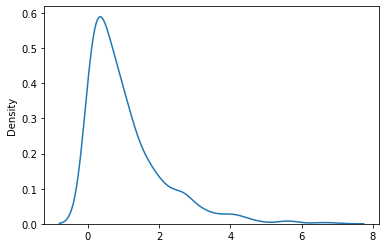

In [29]:
#generate dataset
df = np.random.exponential(size=1000)

#plot the distribution of data values
sns.distplot(df, hist=False, kde=True) 

* We can see that the distribution does not appear to be normal.
* So, we can use the boxcox() function to plot in order that make a normal distributed dataset.

<AxesSubplot:ylabel='Density'>

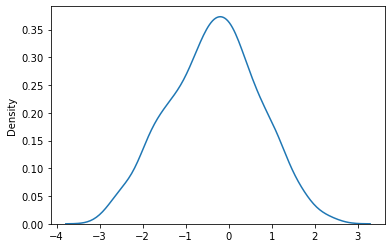

In [30]:
#perform Box-Cox transformation on data
transformed_data, best_lambda = boxcox(df) 

#plot the distribution of the transformed data values
sns.distplot(transformed_data, hist=False, kde=True) 

* We can see that the transformed data follows much more of a normal distribution.

### Pareto Distribution

A distribution following Pareto's law i.e. 80-20 distribution (20% factors cause 80% outcome).<br>

It has two parameter:<br>

    a - shape parameter.

    size - The shape of the returned array.

#### Visualization of Pareto Distribution

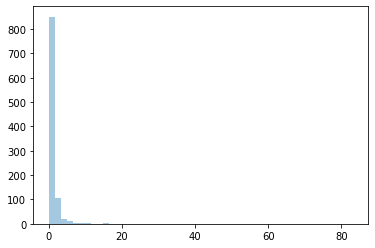

In [31]:
from numpy import random

sns.distplot(random.pareto(a=2, size=1000), kde=False)

plt.show()

### Log Normal Distribution

A lognormal (log-normal or Galton) distribution is a probability distribution with a normally distributed logarithm. A random variable is lognormally distributed if its logarithm is normally distributed.<br>

Skewed distributions with low mean values, large variance, and all-positive values often fit this type of distribution. Values must be positive as log(x) exists only for positive values of x.

### Binomial Distribution

A binomial distribution is a simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes (the prefix “bi” means two, or twice).<br>
        * The number of trials has to be fixed.<br>
        * The events must be independent.<br>
        * Each trial outcome must be either a success or a failure.<br>
        * Probabilities must remain constant for each trial.

Formula:
$$ \mu \ = \ n \ p $$

$$ \sigma^2 \ = \ n \ p \ q $$

$$ \sigma = \sqrt \ n \ p \ q $$

where:
$$ \ P = \ probability \ of \ success \ in \ one \ trial.$$
$$ \ Q = \ 1-p = \ probability \ of \ failure \ in \ one \ trail.$$
$$ \ N = \ number \ of \ trails.$$

### Bernoulli distribution

A Bernoulli distribution is a special case of the binomial distribution. We assume a trial which has a probability of success p, and failure 1-p.<br>
In such cases, we assume that n = 1. Thus, the parameters of the distribution become:

Formula:
$$ \mu \ = \ p $$

$$ \sigma^2 \ = \ p \ (1\ -\ p) $$

$$ \sigma = \sqrt \ p (1\ -\ p) $$

where:
$$ \ P = \ probability \ of \ success \ in \ one \ trial.$$
$$ \ Q = \ 1-p = \ probability \ of \ failure \ in \ one \ trail.$$
$$ \ N = \ number \ of \ trails.$$
